In [2]:
import pandas as pd
import sqlite3

In [5]:
conn = sqlite3.connect('../tmp/dump3.db')

df = pd.read_sql("""
    select * from train_position where date(created_at, 'auto') > '2025-06-06'
""",conn,
    dtype={
        "relation": "category",
        "menetvonal": "category",
        "elvira_id": "category",
        "train_number": "category",
        "line": "category"
    },)

In [8]:
df.to_pickle('../tmp/dump3.pkl')

In [9]:
df['timestamp'] = pd.to_datetime(df['created_at'], unit='s')

In [12]:
df = df[df['lat'] > 40]

In [15]:
df = df.set_index('timestamp')

In [16]:
df.head()

,created_at,lat,lon,delay,relation,train_number,menetvonal,elvira_id,line
timestamp,,,,,,,,,
2025-06-07 16:57:41,1749315461,47.64133,19.65526,8.0,Újszász - Hatvan,5513231,MAV,_250607,NaN
2025-06-07 16:57:41,1749315461,47.49243,21.56193,33.0,Wien Hbf - Chop,55143,MAV,8018425_250607,100
2025-06-07 16:57:41,1749315461,47.48460,18.82997,7.0,Wien Hbf - Budapest-Keleti,55147,MAV,8018423_250607,1U
2025-06-07 16:57:41,1749315461,47.46358,19.01997,2.0,Budapest-Keleti - Wien Hbf,55148,MAV,8018421_250607,NaN
2025-06-07 16:57:41,1749315461,47.52648,21.64364,0.0,Nyírábrány - Debrecen,5516833,MAV,7596986_250607,NaN


<Axes: xlabel='timestamp'>

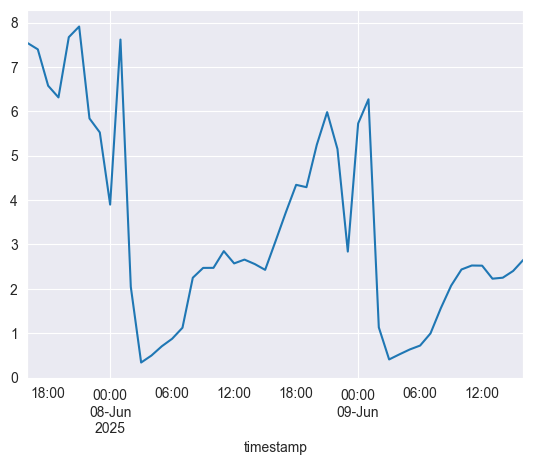

In [18]:
df.resample('1h')['delay'].mean().plot()

In [24]:
df.groupby('relation')['delay'].agg(['mean', 'count', 'std']).sort_values(by='mean', ascending=False)

/var/folders/lt/gqr91__s30l64fglfjp_cdzh0000gn/T/ipykernel_84272/3127050850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('relation')['delay'].agg(['mean', 'count', 'std']).sort_values(by='mean', ascending=False)


,mean,count,std
relation,,,
Praha hl. n. - Budapest-Nyugati,54.875149,4205,61.441287
Nyírábrány - Budapest-Keleti,44.493421,304,1.221354
Debrecen - Baia Mare,42.397765,895,30.176149
Budapest-Déli - Zagreb Glavni Kol.,34.828926,3782,39.109008
Braşov - Budapest-Keleti,32.670436,4245,57.862043
...,...,...,...
Hegyeshalom - Bratislava-Petrzalka,0.000000,471,0.000000
Mezőtúr - Szarvas,0.000000,458,0.000000
Magyarbóly - Villány,0.000000,385,0.000000


<Axes: title={'center': 'delay'}, xlabel='menetvonal'>

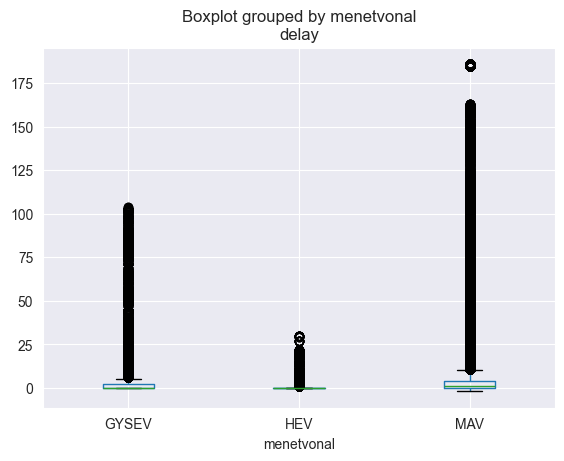

In [25]:
df.boxplot('delay', by='menetvonal')

array([[<Axes: title={'center': 'delay'}>]], dtype=object)

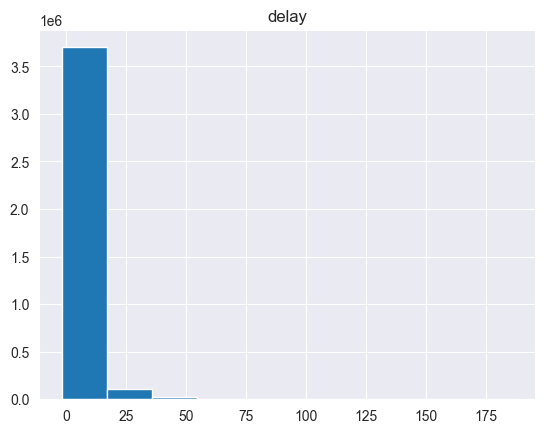

In [29]:
%%sql
select distinct relation, max(delay), count(distinct elvira_id) from train_position where delay > 120 group by relation ;

,relation,max(delay),count(distinct elvira_id)
0,Balatonfüred - Budapest-Déli,285,1
1,Beli Manastir - Pécs,123,1
2,Braşov - Budapest-Keleti,163,1
3,Budapest-Déli - Dunaújváros,377,1
4,Budapest-Déli - Nagykanizsa,147,2
5,Csömör - Örs vezér tere,348,1
6,Esztergom - Budapest-Nyugati,175,1
7,Keszthely - Budapest-Déli,161,1
8,Praha hl. n. - Budapest-Nyugati,186,2
9,Örs vezér tere - Csömör,121,1
